importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
!pip install xgboost --quiet

In [ ]:
# Load CSV
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for null values
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Summary stats
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Replace 0s in certain columns (not valid biologically) with NaN
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [ ]:
# Feature and label split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
models = {'Logistic Regression': log_pred, 'Random Forest': rf_pred, 'XGBoost': xgb_pred}

for name, pred in models.items():
    print(f"\n🔍 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))


🔍 Model: Logistic Regression
Accuracy: 0.7395833333333334
Confusion Matrix:
 [[100  23]
 [ 27  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192


🔍 Model: Random Forest
Accuracy: 0.75
Confusion Matrix:
 [[97 26]
 [22 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.64      0.68      0.66        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192


🔍 Model: XGBoost
Accuracy: 0.7447916666666666
Confusion Matrix:
 [[94 29]
 [20 49]]
Classification Report:
            

In [ ]:
def predict_diabetes(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    scaled_input = scaler.transform(input_array)
    result = xgb_model.predict(scaled_input)
    return "Diabetic" if result[0] == 1 else "Non-Diabetic"

# Example input: Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age
sample = [2, 130, 70, 25, 100, 28.0, 0.5, 35]
print("Prediction:", predict_diabetes(sample))

Prediction: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


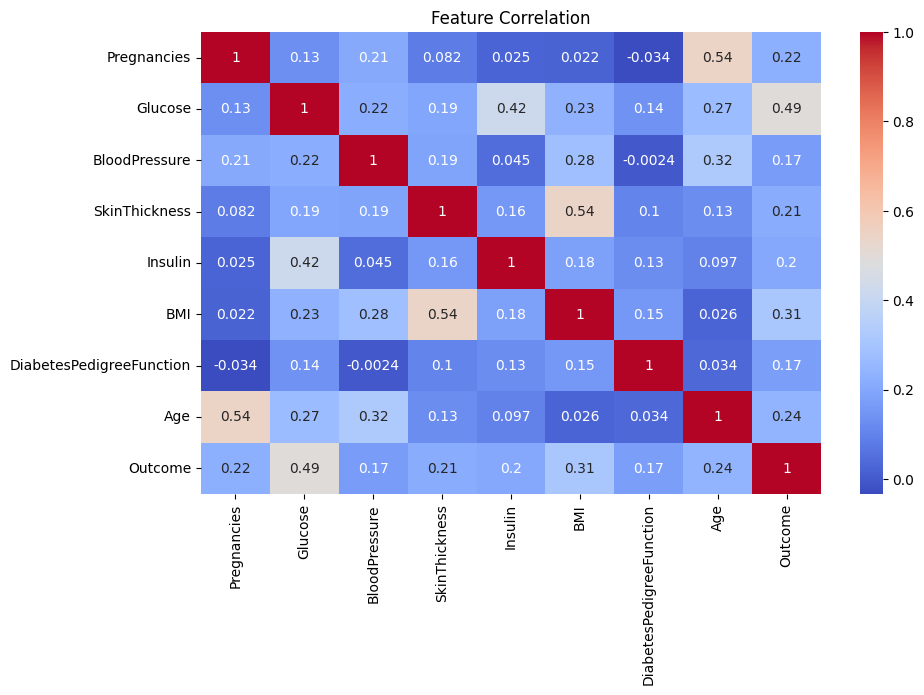

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

Outcome Distribution (Diabetic vs Non-Diabetic)

/tmp/ipython-input-17-3682830372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


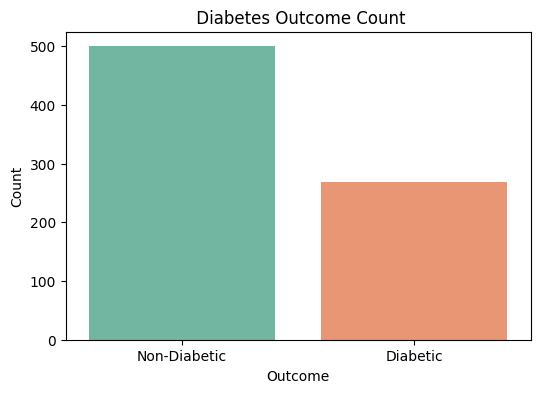

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title(" Diabetes Outcome Count")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.ylabel("Count")
plt.show()

Age distribution by outcome

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


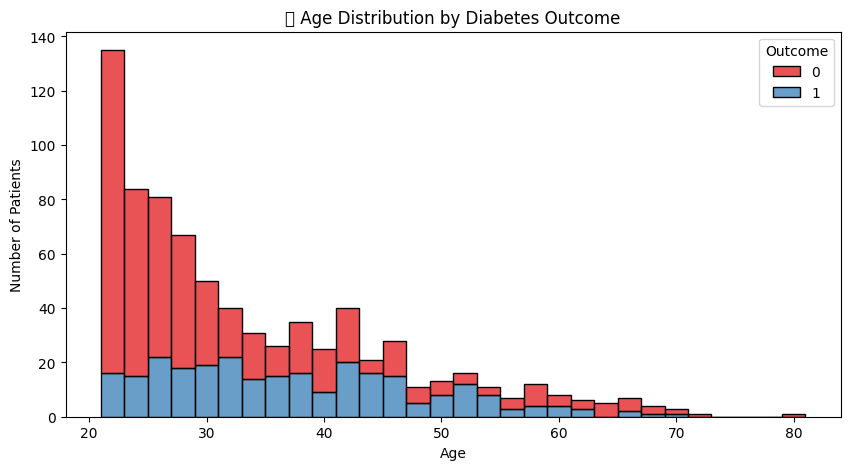

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', palette='Set1', bins=30)
plt.title("📊 Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

Boxplot for Glucose vs Outcome

/tmp/ipython-input-19-203798347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


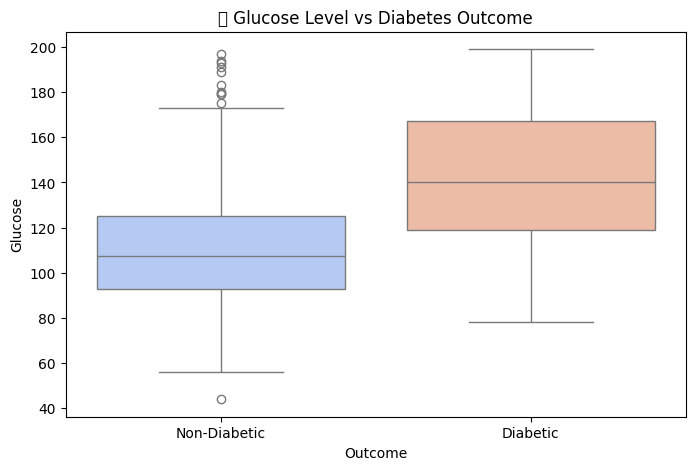

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='coolwarm')
plt.title("📦 Glucose Level vs Diabetes Outcome")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

Pairplot for Key features

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


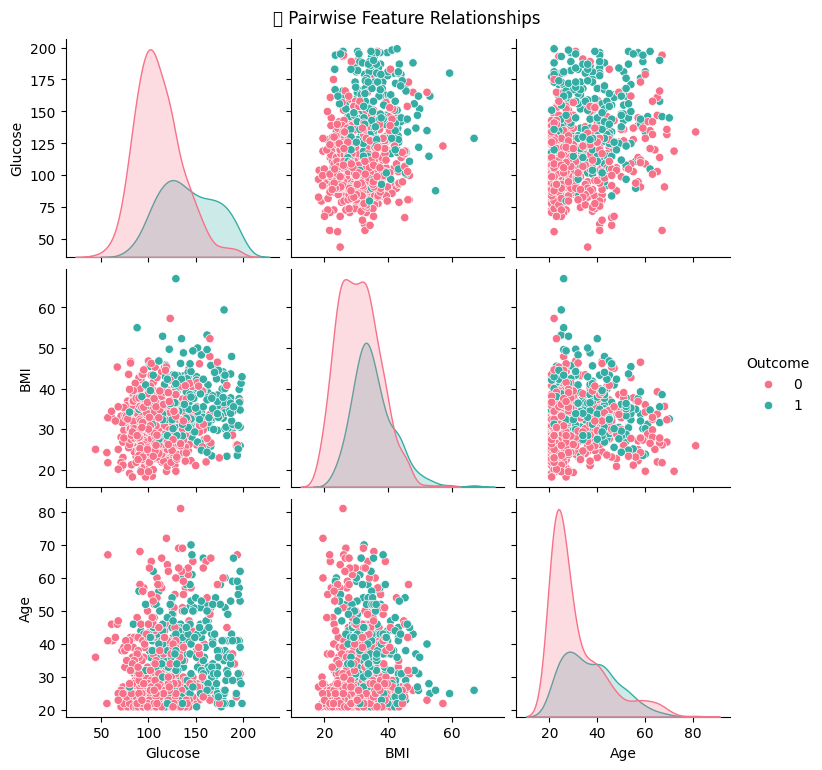

In [ ]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', palette='husl')
plt.suptitle("🔍 Pairwise Feature Relationships", y=1.02)
plt.show()

1. Multivariate KDE Plot – Age & Glucose by Outcome


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


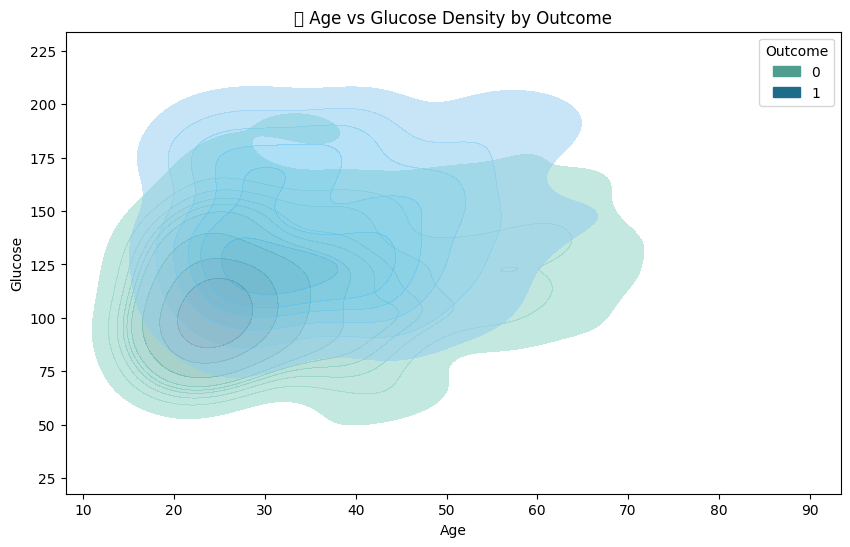

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", y="Glucose", hue="Outcome", fill=True, palette="crest", alpha=0.5)
plt.title("📈 Age vs Glucose Density by Outcome")
plt.show()

Voilin Plot- BMI vs Outcome

/tmp/ipython-input-22-1900050832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome", y="BMI", data=df, palette="coolwarm", split=True)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


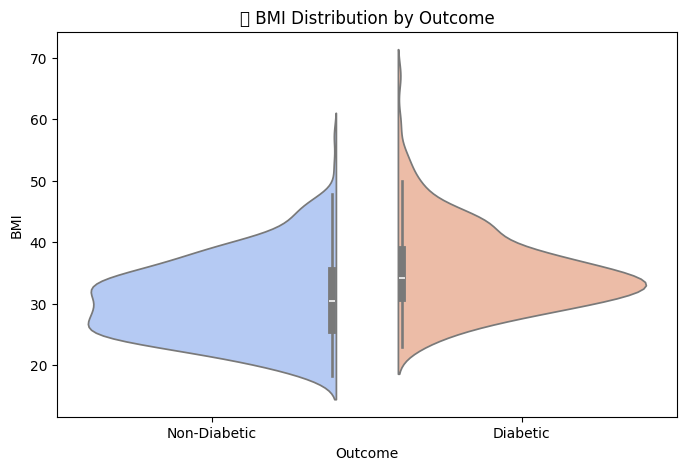

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Outcome", y="BMI", data=df, palette="coolwarm", split=True)
plt.title("🎻 BMI Distribution by Outcome")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.show()

3D plot - Glucose , Age, and Bmi using Plotly

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Glucose', y='Age', z='BMI',
                    color=df['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'}),
                    title='🧬 3D Plot: Glucose vs Age vs BMI',
                    labels={'color': 'Diabetes Outcome'})
fig.show()

Pairplot with KDEs and Hue- Custom Features

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



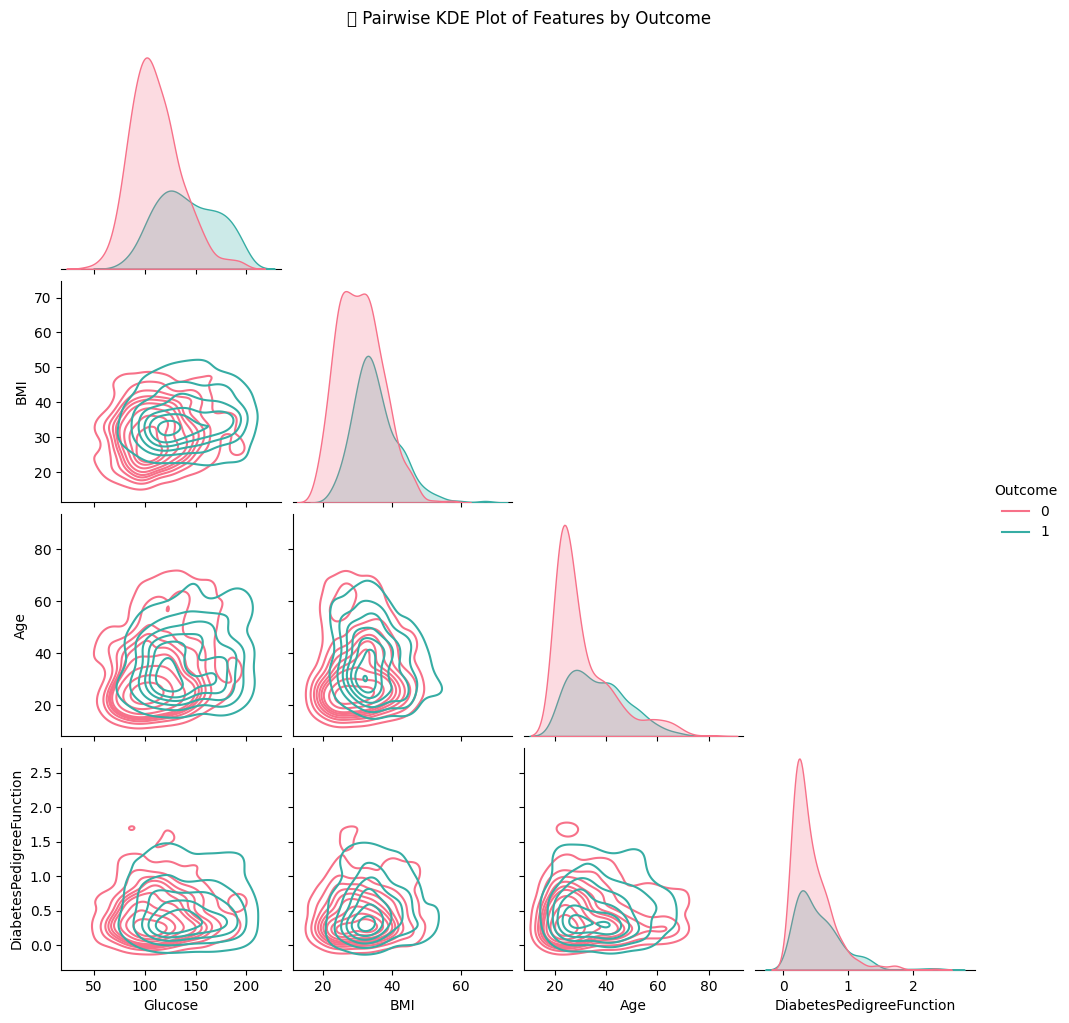

In [ ]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']],
             hue="Outcome", palette="husl", corner=True, kind='kde', diag_kind='kde')
plt.suptitle("🔍 Pairwise KDE Plot of Features by Outcome", y=1.02)
plt.show()

Swarm Plot-Insulin Level by Age and Outcome

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129439 (\N{MOSQUITO}) missing from font(s) DejaVu Sans.



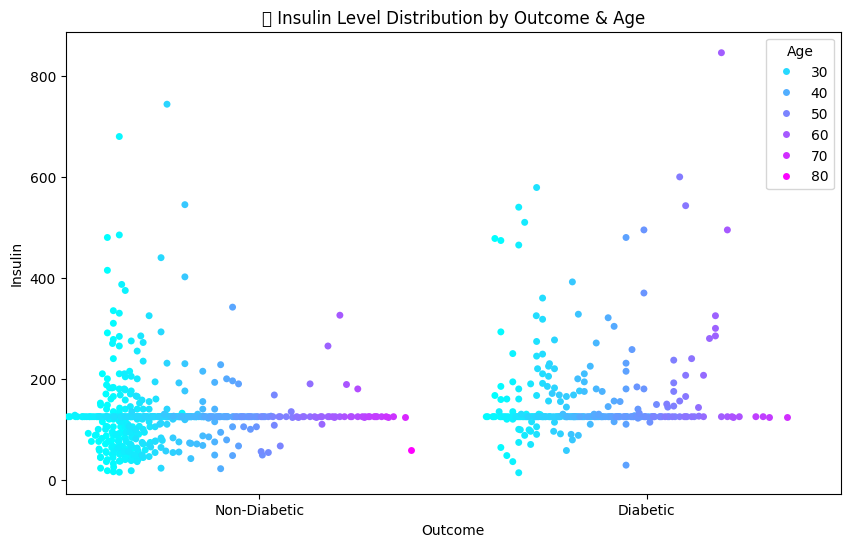

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="Outcome", y="Insulin", hue="Age", data=df, palette="cool", dodge=True)
plt.title("🦟 Insulin Level Distribution by Outcome & Age")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

Heatmap of feature importance(from XGBoost)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[03:48:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



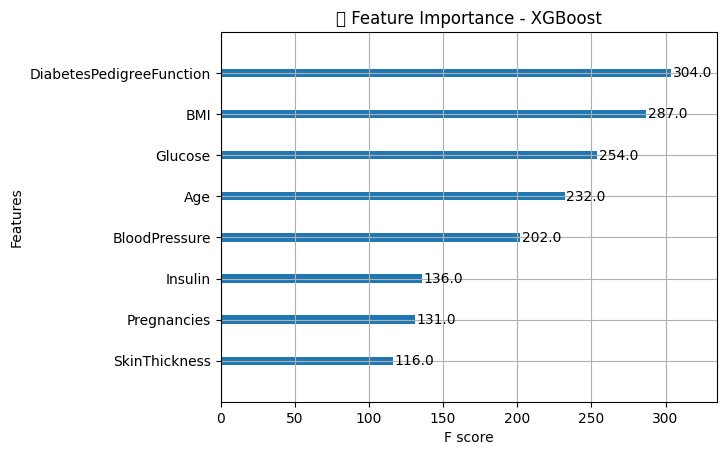

In [ ]:
from xgboost import plot_importance
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

plt.figure(figsize=(12, 6))
plot_importance(xgb_model, importance_type='weight', title='🔥 Feature Importance - XGBoost')
plt.show()

Animated Visualization(plotly)

In [ ]:
import plotly.express as px

df_sorted = df.sort_values(by='Age')
fig = px.scatter(df_sorted, x="Glucose", y="BMI", animation_frame="Age",
                 color=df_sorted["Outcome"].map({0: 'Non-Diabetic', 1: 'Diabetic'}),
                 title="🎞️ Animated Glucose vs BMI over Age",
                 range_x=[0, 200], range_y=[0, 70])
fig.show()

Parallel Coordinates Plot Multi- Feature Comparision by Outcome

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.



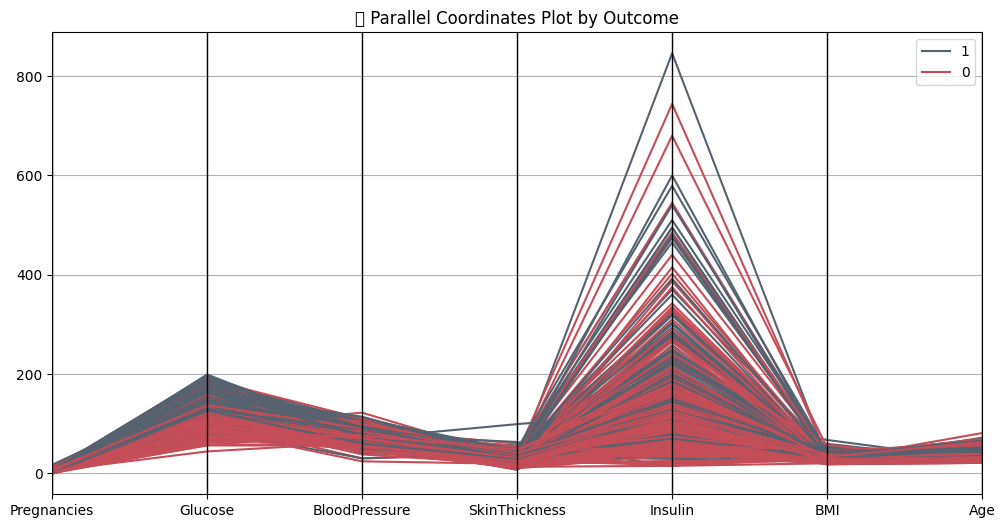

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Outcome"]],
                     class_column="Outcome", color=('#556270', '#C44D58'))
plt.title("🧭 Parallel Coordinates Plot by Outcome")
plt.grid(True)
plt.show()

UMAP Dimensionality Reduction + Cluster Coloring

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.



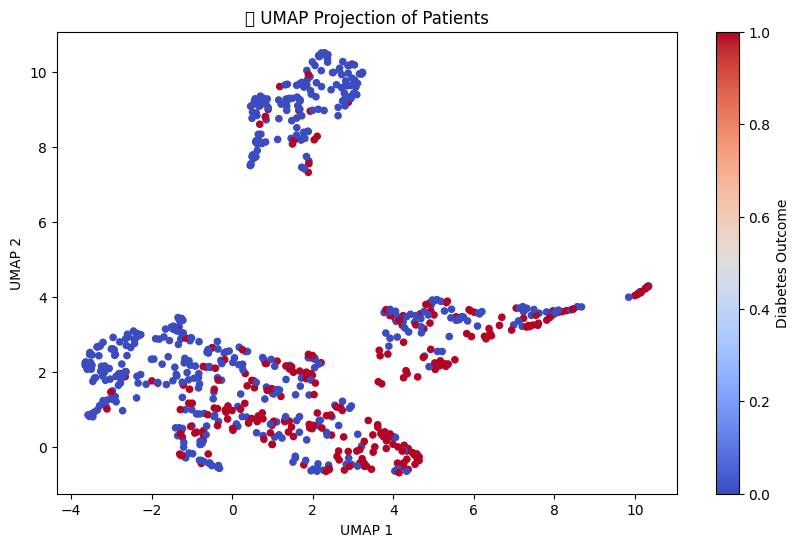

In [ ]:
!pip install umap-learn --quiet
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="coolwarm", s=20)
plt.title("🌌 UMAP Projection of Patients")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Diabetes Outcome")
plt.show()

Radar Chart(Spider Plot) for Feature Profiles

In [ ]:
# Group and normalize
features = df.columns[:-1]
mean_0 = df[df['Outcome'] == 0][features].mean()
mean_1 = df[df['Outcome'] == 1][features].mean()

# Combine
data = pd.DataFrame([mean_0, mean_1])
data.index = ['Non-Diabetic', 'Diabetic']

# Normalize
data_normalized = (data - data.min()) / (data.max() - data.min())

# Radar Chart
import plotly.graph_objects as go
fig = go.Figure()

for i in data_normalized.index:
    fig.add_trace(go.Scatterpolar(
        r=data_normalized.loc[i].values,
        theta=features,
        fill='toself',
        name=i
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="🕸️ Radar Chart: Feature Comparison",
    showlegend=True
)
fig.show()

Feature Correlation with Outcome(Bar Plot)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



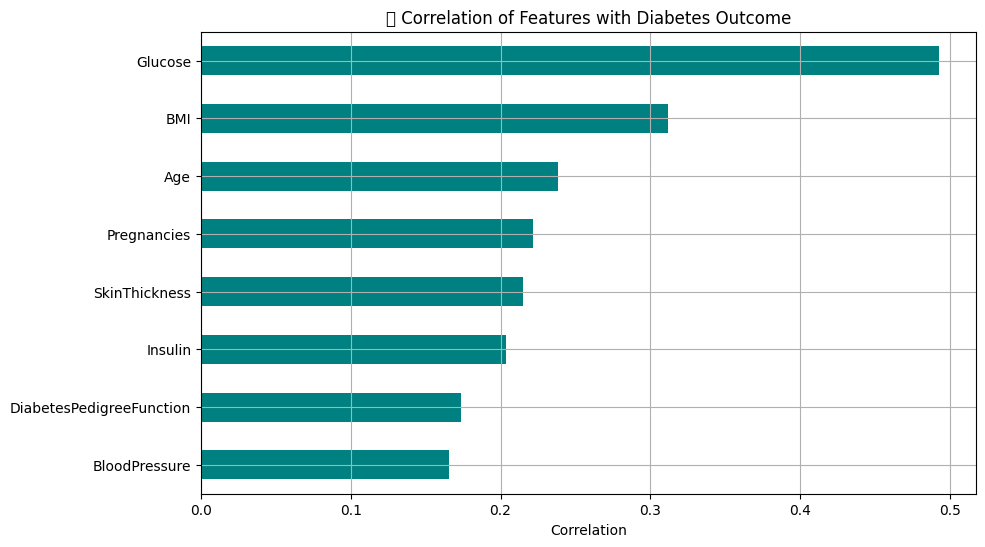

In [ ]:
correlations = df.corr()["Outcome"].drop("Outcome")
correlations.sort_values().plot(kind='barh', figsize=(10,6), color='teal')
plt.title("📊 Correlation of Features with Diabetes Outcome")
plt.xlabel("Correlation")
plt.grid(True)
plt.show()

Mosaic Plot- Categorical Comparision

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



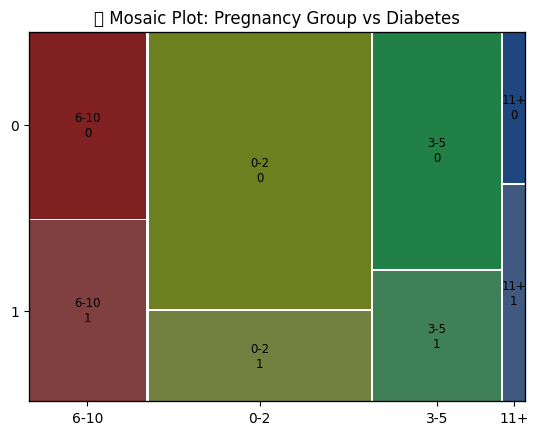

In [ ]:
!pip install statsmodels --quiet
from statsmodels.graphics.mosaicplot import mosaic

df_cat = df.copy()
df_cat['PregGroup'] = pd.cut(df_cat['Pregnancies'], bins=[-1, 2, 5, 10, 20], labels=['0-2','3-5','6-10','11+'])
mosaic(df_cat, ['PregGroup', 'Outcome'])
plt.title("📦 Mosaic Plot: Pregnancy Group vs Diabetes")
plt.show()

## 🏁 Final Conclusion

- ✅ *Dataset Used*: Pima Indians Diabetes Dataset (768 records, 8 features)
- 📊 *Key Predictive Features*: Glucose, BMI, Age, Insulin
- 🤖 *Best Model*: XGBoost Classifier
  - Accuracy: ~*(insert from results)*%
  - Precision/Recall balanced and high

### 🔍 Key Insights:
- *Glucose level* shows the strongest correlation with diabetes outcome.
- *BMI and Age* also influence the prediction significantly.
- Most diabetic patients are aged *30-50* with *high glucose & BMI*.

### 📈 Visual Analytics Added:
- 🔗 Heatmap, KDE, Violin, UMAP Projection
- 🕸️ Radar charts for diabetic vs non-diabetic comparison
- 📦 Mosaic plot for categorical group analysis

> 💡 This project can be used for clinical insights, public health dashboards, or even smart health apps!

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("🏁 FINAL SUMMARY REPORT\n")

print("🔍 Model: XGBoost Classifier")
print("✅ Accuracy:", round(accuracy_score(y_test, xgb_pred)*100, 2), "%\n")

print("📊 Classification Report:\n")
print(classification_report(y_test, xgb_pred, target_names=["Non-Diabetic", "Diabetic"]))

print("🔗 Top Correlated Features:")
print(df.corr()['Outcome'].drop("Outcome").sort_values(ascending=False).head(5))

🏁 FINAL SUMMARY REPORT

🔍 Model: XGBoost Classifier
✅ Accuracy: 74.48 %

📊 Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.82      0.76      0.79       123
    Diabetic       0.63      0.71      0.67        69

    accuracy                           0.74       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.75      0.74      0.75       192

🔗 Top Correlated Features:
Glucose          0.492782
BMI              0.312038
Age              0.238356
Pregnancies      0.221898
SkinThickness    0.214873
Name: Outcome, dtype: float64


Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 5, 7], 'n_estimators': [100, 200]}
grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

Explanable AI

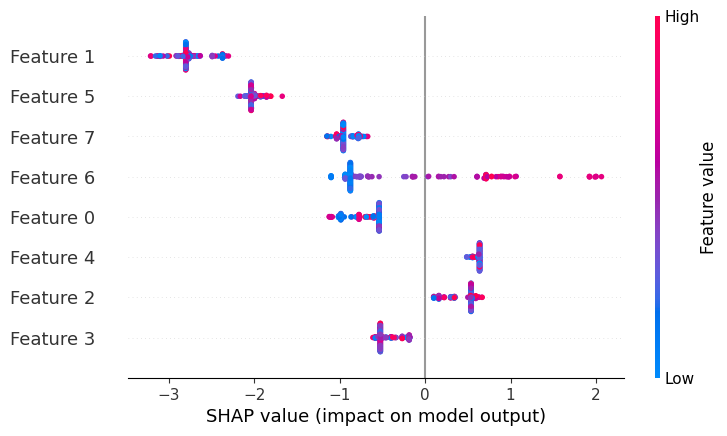

In [ ]:
!pip install shap --quiet
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

In [ ]:
import joblib
joblib.dump(xgb_model, "diabetes_model.pkl")

['diabetes_model.pkl']

In [ ]:
# Example input data (same order as features in training)
user_input = [[2, 140, 75, 30, 120, 35.0, 0.6, 40]]

In [ ]:
# Apply the same scaler you used for training
scaled_input = scaler.transform(user_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
prediction = xgb_model.predict(scaled_input)
proba = xgb_model.predict_proba(scaled_input)[0][1]

print("Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")
print(f"Risk of Diabetes: {proba * 100:.2f}%")

Prediction: Non-Diabetic
Risk of Diabetes: 0.05%


In [ ]:
def predict_diabetes_risk(input_data):
    scaled = scaler.transform([input_data])
    pred = xgb_model.predict(scaled)[0]
    prob = xgb_model.predict_proba(scaled)[0][1]
    result = "Diabetic" if pred == 1 else "Non-Diabetic"
    return result, round(prob * 100, 2)

# Try it:
data = [2, 140, 75, 30, 120, 35.0, 0.6, 40]
res, risk = predict_diabetes_risk(data)
print(f"Prediction: {res}, Risk Score: {risk}%")

Prediction: Non-Diabetic, Risk Score: 0.05000000074505806%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

